In [24]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs

In [25]:
# open pickled lens list
pickled_lens_list = os.path.join(config.machine.dir_01, '01_hlwas_sim_detectable_lens_list.pkl')
lens_list = util.unpickle(pickled_lens_list)
assert len(lens_list) != 0, f'No pickled lenses found. Check {pickled_lens_list}.'
count = len(lens_list)

In [28]:
for lens in lens_list:
    if lens.main_halo_mass < 0:
        print(lens.main_halo_mass)

-417842711.88750315
-370415594.6246357
-77695265.11476421
-164771723.62156963
-378860505.59112966
-363360439.81076956
-371582220.78401136
-377232396.9196502
-364508578.8437246
-149762264.29648304
-416891008.04207087
-391382916.59908295
-234275118.6770724
-306114011.01380396
-87103631.62265587
-205745118.27131128
-7229132.987738609
-352061851.0421748
-408693216.4265654
-129218379.75531006
-166309334.78227234
-411357131.61343765
-289903771.0100155
-233096068.10403013
-391080420.72473335
-417677559.00218725
-31246346.94967079
-380435582.95627975
-225830690.13835973
-382996290.9525299
-333225406.72611046
-414266783.84857035
-353369438.6054238
-93544953.63955307
-243091516.7057523
-320635757.39750075
-417807837.7371776
-406882094.6264324
-406565847.3696804
-346682178.8647914
-255713694.2857371
-326064457.65438616
-53514058.96692848
-271790816.60855025
-378383812.82154465
-355131284.3445654
-342272740.4083179
-72753445.64772129
-407062237.8700745
-339763977.5441108
-416393968.7565274
-359087

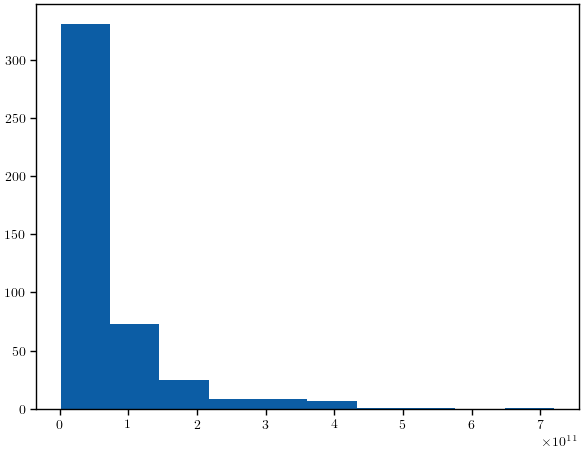

In [26]:
plt.hist([lens.lens_stellar_mass for lens in lens_list])
plt.show()

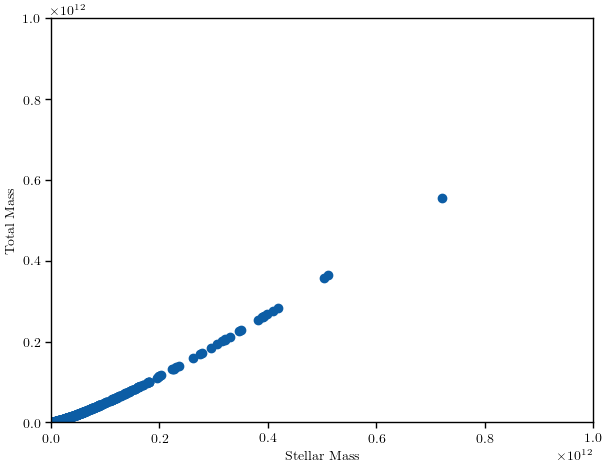

In [27]:
plt.plot([lens.lens_stellar_mass for lens in lens_list], [lens.lens_total_mass for lens in lens_list], 'o')
plt.xlabel('Stellar Mass')
plt.ylabel('Total Mass')
plt.xlim(0, 1e12)
plt.ylim(0, 1e12)
plt.show()